In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram, butter, lfilter

In [3]:
# Cargar archive de audio
fs, data = wavfile.read('/content/Idles.wav')

Sampling rate: 44100 Hz
Duration: 60.03 seconds


/tmp/ipython-input-1902375556.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx), shading='gouraud')


Files saved: drums_removed.wav and guitar_isolated.wav


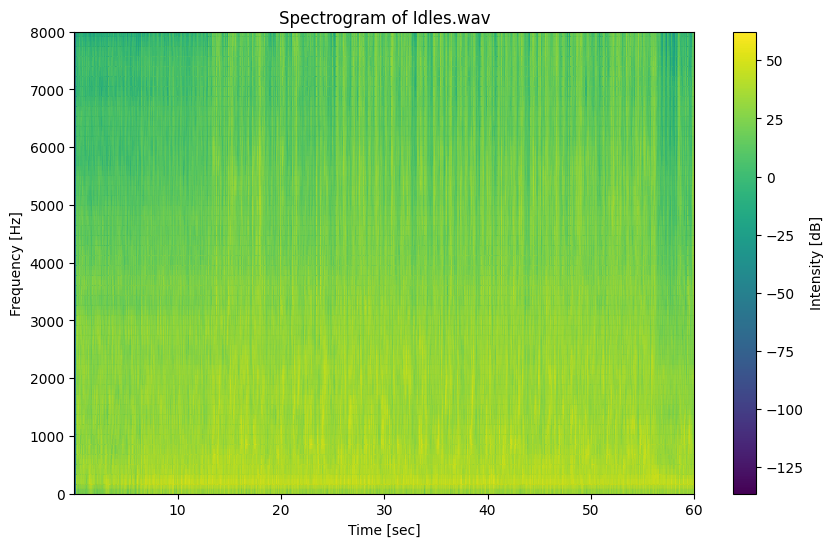

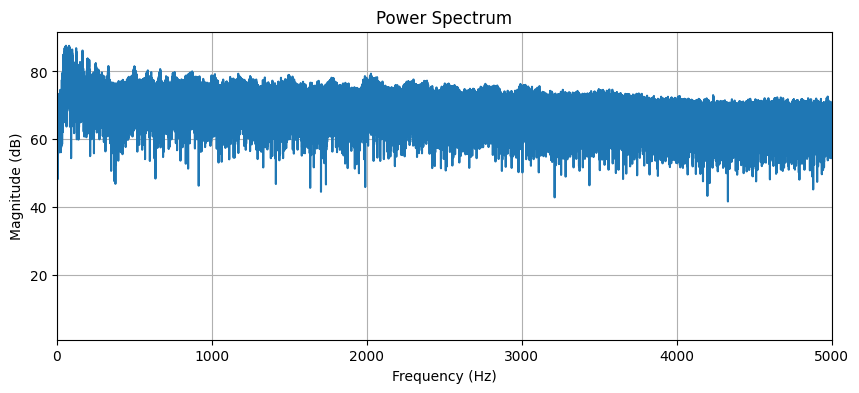

In [4]:
# Revisa si es stereo o mono
if len(data.shape) > 1:
 data_mono = data.mean(axis=1)
else:
 data_mono = data
# Duracion del audio
duration = len(data_mono) / fs
print(f"Sampling rate: {fs} Hz")
print(f"Duration: {duration:.2f} seconds")
# table para identificar frecuencias
f, t_spec, Sxx = spectrogram(data_mono, fs)
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Idles.wav')
plt.colorbar(label='Intensity [dB]')
plt.ylim(0, 8000) # Rango audible de sonido
plt.savefig('spectrogram.png')
# Calculo para ver transformada de Forier para ver el espectro
fft_data = np.fft.rfft(data_mono)
freqs = np.fft.rfftfreq(len(data_mono), 1/fs)
magnitude = np.abs(fft_data)
plt.figure(figsize=(10, 4))
plt.plot(freqs, 10 * np.log10(magnitude))
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xlim(0, 5000)
plt.grid()
plt.savefig('power_spectrum.png')
# Funcion de flitrado
def butter_highpass(cutoff, fs, order=5):
 nyq = 0.5 * fs
 normal_cutoff = cutoff / nyq
 b, a = butter(order, normal_cutoff, btype='high', analog=False)
 return b, a
def highpass_filter(data, cutoff, fs, order=5):
 b, a = butter_highpass(cutoff, fs, order=order)
 y = lfilter(b, a, data)
 return y
def butter_bandpass(lowcut, highcut, fs, order=5):
 nyq = 0.5 * fs
 low = lowcut / nyq
 high = highcut / nyq
 b, a = butter(order, [low, high], btype='band')
 return b, a
def bandpass_filter(data, lowcut, highcut, fs, order=5):
 b, a = butter_bandpass(lowcut, highcut, fs, order=order)
 y = lfilter(b, a, data)
 return y
# Frecuencia lista fs = 44100
# Filtro pasa alto para bateria
# Vamos a usar 300Hz.
filtered_hp = highpass_filter(data_mono, 300, fs)
# Resultado
filtered_hp = (filtered_hp / np.max(np.abs(filtered_hp)) * 32767).astype(np.int16)
wavfile.write('drums_removed.wav', fs, filtered_hp)
# Filtro pasa banda para guitarra en el rango (300Hz - 4000Hz)
filtered_bp = bandpass_filter(data_mono, 300, 4000, fs)
# Resultado.
filtered_bp = (filtered_bp / np.max(np.abs(filtered_bp)) * 32767).astype(np.int16)
wavfile.write('guitar_isolated.wav', fs, filtered_bp)
print("Files saved: drums_removed.wav and guitar_isolated.wav")